In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [16]:
e2e_result_dir="e2e_result/"
fcfs_result_name="vllm-1000.0qps-Llama-2-13b-chat-hf-20240611-152834-fcfs.json"
infer_result_name="vllm-1000.0qps-Llama-2-13b-chat-hf-20240611-153759-infer.json"

In [17]:
fcfs_result=json.load(open(e2e_result_dir+fcfs_result_name))
infer_result=json.load(open(e2e_result_dir+infer_result_name))

In [18]:
fcfs_latencies=fcfs_result["latencies"]
infer_latencies=infer_result["latencies"]
df = pd.DataFrame({"fcfs": fcfs_latencies, "infer": infer_latencies})
df_result=df.describe(percentiles=[0.5,0.95])

In [19]:
df_result

,fcfs,infer
count,1000.000000,1000.000000
mean,218.380502,250.950064
std,129.778001,146.708950
min,0.993019,0.373732
50%,219.476928,256.913475
95%,417.573428,470.201428
max,447.411842,498.585558


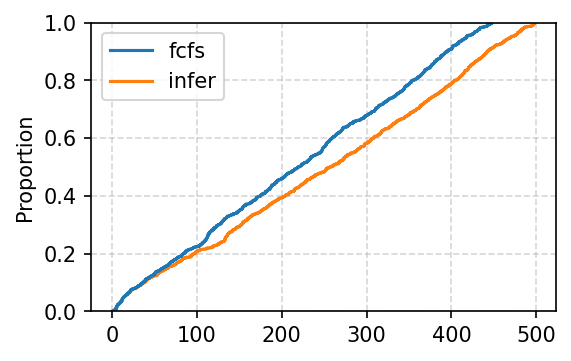

In [20]:
plt.figure(figsize=(4,2.5), dpi=150)
sns.ecdfplot(data=df)
plt.grid(alpha=0.5, linestyle="--")